In [34]:
import pandas as pd
import requests
import json
from googleapiclient.discovery import build
import googleapiclient.discovery
import googleapiclient.errors
from datetime import datetime
import matplotlib.pyplot as plt

In [13]:
video_info_df = pd.read_csv('youtube_videos.csv')
video_info_df.head()

,Video ID,Channel Name,Views,Likes,Subscribers,published_date
0,Vb1gZyckHX8,Markiplier,6955647,178424,37000000,2020-02-20 17:09:08
1,xzDyhUdsuCc,DanTDM,10485117,95312,29100000,2019-05-14 17:10:22
2,UNhGynJEp-M,Ctop,948614,10412,2190000,2023-01-20 18:15:01
3,xwj8mD5MnMg,Camodo Gaming,1856954,19241,3660000,2020-02-20 12:00:11
4,zZSbH9bUVaM,Sam Tabor Gaming,427076,7273,1330000,2021-01-13 20:00:26


In [4]:
video_ids = video_info_df['Video ID'].to_list()

In [4]:
API_KEY = open('youtube_api_3.txt', 'r').read()
relevant_terms = [r"Snakeybus",r"Biped",r"Project Winter - Blackout",r"Worms Rumble",r"Wobbly Life",r"Party Animals",r"Bloons TD Battles 2",r"PICO PARK",r"Perfect Heist 2",r"Goose Goose Duck",r"Stumble Guys",r"Bopl Battle",r"Crab Game",r"The Riflemen",r"Scribblenauts Unlimited",r"Pit People®",r"Duck Game",r"ShellShock Live",r"Worms W.M.D",r"Ratz Instagib",r"Cat Goes Fishing",r"The Mean Greens - Plastic Warfare",r"Tower Unite",r"Clustertruck",r"Garry's Mod",r"Who's Your Daddy?!",r"Human Fall Flat",r"Happy Room",r"Pikuniku",r"Stick Fight: The Game",r"Worms_Ultimate_Mayhem",r"Overcooked! 2",r"Project Winter",r"Super Animal Royale",r"Pummel Party",r"ibb & obb",r"Bloons TD 6",'gamplay', 'walkthrough', 'gaming', 'tutorial', 'game', 'gamer', 'multi-player', 'Games']

In [5]:
youtube = build('youtube', 'v3', developerKey=API_KEY)

In [6]:
def get_video_info(video_id):
    """Get video information for a given video ID."""
    video_url = f'https://www.googleapis.com/youtube/v3/videos?part=snippet&id={video_id}&key={API_KEY}'
    response = requests.get(video_url)
    video_data = response.json()

    if 'items' in video_data and len(video_data['items']) > 0:
        title = video_data['items'][0]['snippet']['title']
        description = video_data['items'][0]['snippet']['description']
        tags = video_data['items'][0]['snippet'].get('tags', [])
        category_id = video_data['items'][0]['snippet']['categoryId']
        return title, description, tags, category_id
    return None, None, None, None


In [7]:
def filter_video_ids(video_ids, relevant_terms):
    """Filter video IDs based on relevant terms in title, description, or tags, if category is gaming."""
    filtered_video_ids = []

    for video_id in video_ids:
        title, description, tags, category_id = get_video_info(video_id)

        # Check if the category ID is 20 (gaming)
        if category_id == '20':
            filtered_video_ids.append(video_id)
            continue

        # If not gaming, check for relevant terms
        if any(term.lower() in title.lower() for term in relevant_terms) or \
           any(term.lower() in description.lower() for term in relevant_terms) or \
           any(term.lower() in tag.lower() for tag in tags for term in relevant_terms):
            filtered_video_ids.append(video_id)

    return filtered_video_ids

In [25]:
filtered_ids = filter_video_ids(video_ids, relevant_terms)
filtered_ids

['Vb1gZyckHX8',
 'xzDyhUdsuCc',
 'UNhGynJEp-M',
 'xwj8mD5MnMg',
 'zZSbH9bUVaM',
 'AsV7_nJHd-A',
 'BsjS8bmMFNU',
 'FJ5AG1zv0pY',
 'ZZx3S4GlcHQ',
 'A3_Xhge3qlE',
 'ATfxLkKqBYQ',
 'RaWn4YXZpP8',
 '3a2Ru1d5YCc',
 'E4vzdt4wTXc',
 'dedWvlqgeq4',
 'Whyndp_iyZM',
 '83tvhlrT2lc',
 'AuEAoD8pYRk',
 'NtzkdSPMfOc',
 'XxBtAU4p6GA',
 'RtC0eQJoSFM',
 'CoBanjYraik',
 'NVq487C9Me4',
 'Cws3_y7gXXM',
 '0sefoTPb20c',
 'hccR1OjsoAc',
 'F9eKeEV5jgU',
 'DDFviIAy0YU',
 'oNx9K26ylU4',
 'abJrWHWVX1M',
 '2MSyz5O1-ow',
 '9lhz2ntmb2A',
 'S1oZRK1jOnE',
 'oUlG00icCVE',
 '4oNHRAnXQ80',
 'w6_MtKpJC2c',
 'dHyI_6t28io',
 'aELWuDkDYuA',
 '-Lni83C9BLI',
 'm60QczK9cuQ',
 '9ihtoXtbn-8',
 'Qmr95FH-LdE',
 'E2_8J91PPyI',
 'OlFiflqr1Kw',
 'TRnuTlTUO9g',
 'c0hzMKTRYMI',
 'BMbdhFtupMw',
 'VAAm7GTxJXM',
 'eNZz6n6us0o',
 'BaPGZJKwxfo',
 'smlef-jkmuQ',
 'uXhfnGv_fEQ',
 'xUko31SmXxA',
 'Ta9ReKaZOGw',
 'YSlrAuFAnhc',
 'hV_nResY_nE',
 'wgR1tNgLV68',
 'Aj7tJ79EiQU',
 'cs3BOop15nU',
 'wrE8wHZQ1BI',
 'TjApDcGW9Io',
 'UpNid_rWDnI',
 '9Lypkw

In [11]:
with open('filtered_video_ids1.json', 'r') as f:
    filtered_ids = json.load(f)


Analysis

In [14]:
filtered_video_info_df = video_info_df[video_info_df['Video ID'].isin(filtered_ids)]
filtered_video_info_df.head()

,Video ID,Channel Name,Views,Likes,Subscribers,published_date
0,Vb1gZyckHX8,Markiplier,6955647,178424,37000000,2020-02-20 17:09:08
1,xzDyhUdsuCc,DanTDM,10485117,95312,29100000,2019-05-14 17:10:22
2,UNhGynJEp-M,Ctop,948614,10412,2190000,2023-01-20 18:15:01
3,xwj8mD5MnMg,Camodo Gaming,1856954,19241,3660000,2020-02-20 12:00:11
4,zZSbH9bUVaM,Sam Tabor Gaming,427076,7273,1330000,2021-01-13 20:00:26


In [15]:
channel_group_df = filtered_video_info_df.groupby('Channel Name').agg({'Views': 'sum', 'Likes': 'sum', 'Subscribers': 'first'}).sort_values(by=['Views', 'Likes'], ascending=False).reset_index()
channel_group_df.head()

,Channel Name,Views,Likes,Subscribers
0,FGTeeV,196047966,1684806,23900000
1,SSundee,165655603,5557940,24200000
2,ItsFunneh,145581835,2041694,11400000
3,Aphmau,137376858,1492154,22000000
4,SMii7Y,87480467,2677223,7320000


In [23]:
suitable_channels = channel_group_df[channel_group_df['Subscribers'] < 1000000]
suitable_channels.head(15)

,Channel Name,Views,Likes,Subscribers
11,BiN TV,43866580,100705,386000
17,Blox4Fun,34293626,230183,952000
19,Coty,30454076,1384143,330000
20,SakawGaming,28257110,-1,149000
26,Mobile Arcade,22361831,123096,598000
27,Animals Home Animation,20973431,72702,444000
30,Johan Grönvall - Zapray Games,19491056,716169,419000
37,SAI THE STUMBLER,16107595,344070,349000
40,Chroma Pixel Plays,11624950,156299,110000
41,Vlogs4FUN,11519374,57473,317000


In [24]:
suitable_channels.to_csv('suitable_channels.csv', index=False)

In [18]:
def get_channel_id(channel_name):
    """Get the channel ID using the channel name."""
    search_url = f'https://www.googleapis.com/youtube/v3/search?part=snippet&type=channel&q={channel_name}&key={API_KEY}'
    response = requests.get(search_url)
    data = response.json()

    if 'items' in data and len(data['items']) > 0:
        return data['items'][0]['id']['channelId']
    return None

In [19]:
def get_uploads_playlist_id(channel_id):
    """Get the uploads playlist ID for a given channel ID."""
    channel_url = f'https://www.googleapis.com/youtube/v3/channels?part=contentDetails&id={channel_id}&key={API_KEY}'
    response = requests.get(channel_url)
    data = response.json()

    if 'items' in data and len(data['items']) > 0:
        return data['items'][0]['contentDetails']['relatedPlaylists']['uploads']
    return None

In [20]:
def get_latest_videos(playlist_id, max_results=5):
    """Get the latest videos from a playlist, including publication dates."""
    playlist_url = f'https://www.googleapis.com/youtube/v3/playlistItems?part=snippet&playlistId={playlist_id}&maxResults={max_results}&key={API_KEY}'
    response = requests.get(playlist_url)
    data = response.json()

    video_info = {}
    if 'items' in data:
        for item in data['items']:
            video_id = item['snippet']['resourceId']['videoId']
            published_at = item['snippet']['publishedAt']
            video_info[video_id] = published_at  # Store video ID and publication date
    return video_info

In [21]:
def get_comments(video_id):
    """Get comments for a given video ID."""
    comments = []

    try:  # Wrap the API call in a try-except block
        response = youtube.commentThreads().list(
            part='snippet',
            videoId=video_id,
            textFormat='plainText',
            maxResults=500,
            order='relevance'
        ).execute()

        if response:
            for item in response['items']:
                text = item['snippet']['topLevelComment']['snippet']['textDisplay']
                channel_id = item['snippet']['topLevelComment']['snippet']['channelId']
                like_count = item['snippet']['topLevelComment']['snippet']['likeCount']
                channel_id_text = item['snippet']['topLevelComment']['snippet']['authorChannelId']['value']
                date = item['snippet']['topLevelComment']['snippet'].get('publishedAt', 'N/A')

                if date != 'N/A':
                    date = datetime.fromisoformat(date[:-1])
                else:
                    date = None

                comment = {
                    'video_id': video_id,
                    'text': text,
                    'channel_id': channel_id,
                    'like_count': like_count,
                    'channel_id_text': channel_id_text,
                    'date': date
                }
                comments.append(comment)

    except googleapiclient.errors.HttpError as e:
        # Handle the HttpError
        if e.resp.status == 403 and "commentsDisabled" in str(e):
            print(f"Comments are disabled for video ID: {video_id}")
        elif e.resp.status == 404:  # Check for video not found error
            print(f"Video not found for video ID: {video_id}")
        else:
            raise e

    return comments

In [22]:
def get_comments_on_latest_videos(channel_name):
  channel_id = get_channel_id(channel_name)

  if channel_id:
      uploads_playlist_id = get_uploads_playlist_id(channel_id)

      if uploads_playlist_id:
          latest_video_info = get_latest_videos(uploads_playlist_id)

          # Create a DataFrame to store comments
          all_comments_data = []

          for video_id, published_at in latest_video_info.items():
              comments = get_comments(video_id)
              for comment in comments:
                  all_comments_data.append({
                      'Video ID': video_id,
                      'Published Date': published_at,
                      'Comment': comment['text'],
                      'Channel ID': comment['channel_id'],
                      'Like Count': comment['like_count'],
                      'Commenter': comment['channel_id_text'],
                      'Comment Date': comment['date']
                  })

          # Create a DataFrame from the collected comments
          comments_df = pd.DataFrame(all_comments_data)

          # Display the DataFrame
          return comments_df
  else:
      print("Channel not found.")

In [15]:
channel_names = ['Blox4Fun', 'Coty', 'SakawGaming', 'Chroma Pixel Plays', '']
for channel_name in channel_names:
    channel_latest = get_comments_on_latest_videos(channel_name)
    channel_latest.to_csv(f'{channel_name}_comments.csv', index=False)

Comments are disabled for video ID: pQEAqUpNMwU
Comments are disabled for video ID: dFpNgQnAbmM
Comments are disabled for video ID: -rJ2ynsCAWo
Comments are disabled for video ID: XF3eQnR82_A
Comments are disabled for video ID: Vjd05tz2YMU


In [25]:
blox4fun_comments = pd.read_csv('Blox4Fun_comments.csv')
johan_comments = pd.read_csv('Johan Grönvall - Zapray Games_comments.csv')
sakaw_comments = pd.read_csv('SakawGaming_comments.csv')
mobile_arcade_comments = pd.read_csv('Mobile Arcade_comments.csv')

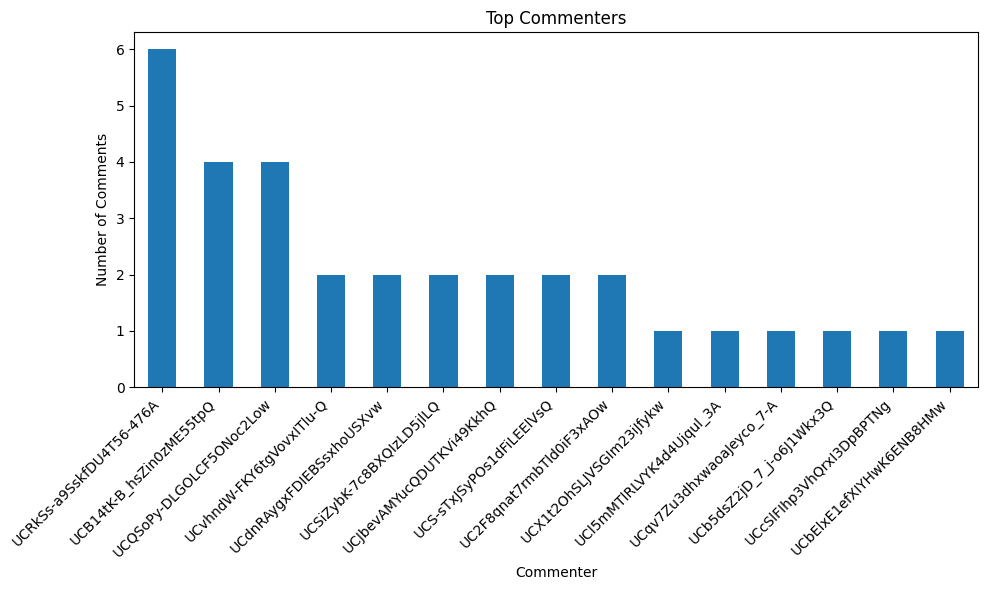

In [38]:
top_n = 15  # Number of top commenter to display
comment_counts = blox4fun_comments['Commenter'].value_counts().head(top_n)

# Plotting
plt.figure(figsize=(10, 6))
comment_counts.plot(kind='bar')
plt.title('Top Commenters')
plt.xlabel('Commenter')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

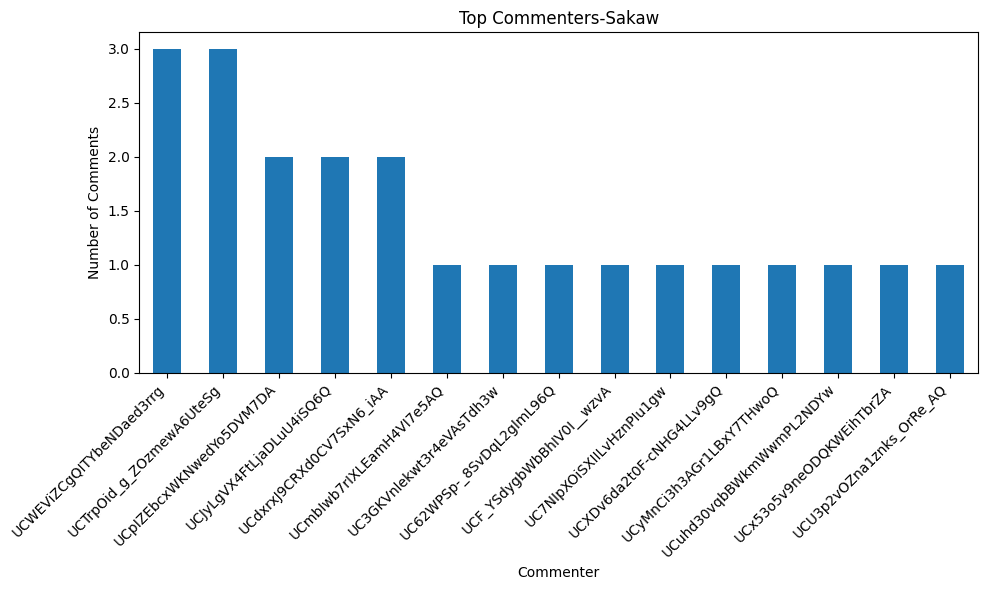

In [49]:
top_n = 15  # Number of top commenter to display
comment_counts = sakaw_comments['Commenter'].value_counts().head(top_n)

# Plotting
plt.figure(figsize=(10, 6))
comment_counts.plot(kind='bar')
plt.title('Top Commenters-Sakaw')
plt.xlabel('Commenter')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [40]:
sakaw_comments[sakaw_comments['Commenter'] == 'UCWEViZCgQITYbeNDaed3rrg']

,Video ID,Published Date,Comment,Channel ID,Like Count,Commenter,Comment Date
31,2ve9IOIpmmk,2024-01-05T13:00:02Z,Wait is it mod or not,UCImQ1eovTV7RTiCd3sku9QQ,0,UCWEViZCgQITYbeNDaed3rrg,2024-01-05 13:02:29
33,m880bDnuask,2023-11-26T02:00:29Z,Let's gooooo sakaw gaming upload new video,UCImQ1eovTV7RTiCd3sku9QQ,8,UCWEViZCgQITYbeNDaed3rrg,2023-11-26 02:50:44
66,yiNOeR3Ewdg,2023-07-19T10:00:48Z,Sakaw Kembali akhirnya 🤯,UCImQ1eovTV7RTiCd3sku9QQ,2,UCWEViZCgQITYbeNDaed3rrg,2023-07-19 11:50:30


### Sam Tabor Gaming

In [42]:
channel_name = 'Sam Tabor Gaming'
sam_tabor_comments = get_comments_on_latest_videos(channel_name)
sam_tabor_comments.to_csv(f'{channel_name}_comments.csv', index=False)

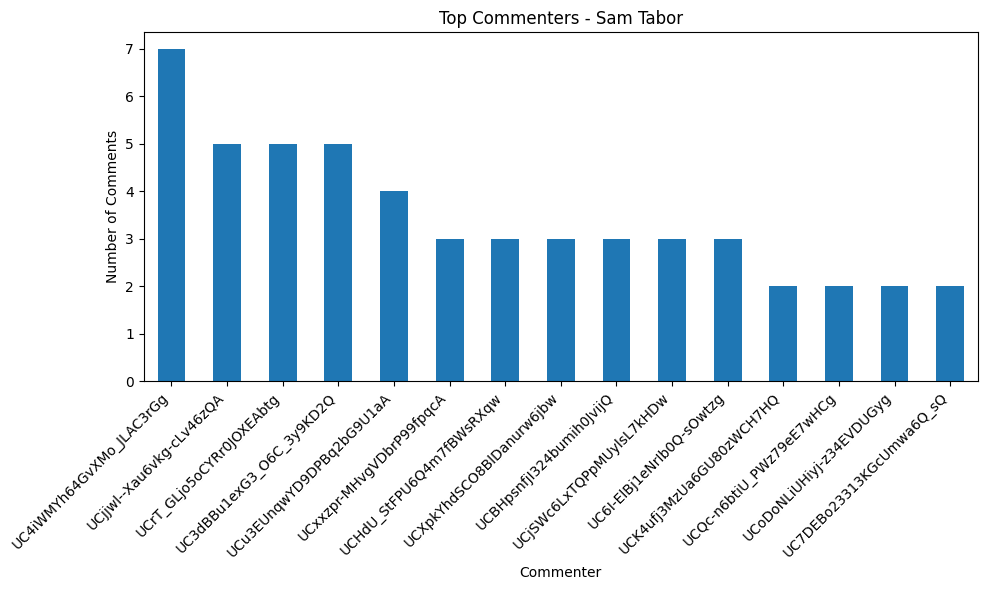

In [48]:
top_n = 15  # Number of top commenter to display
comment_counts = sam_tabor_comments['Commenter'].value_counts().head(top_n)

# Plotting
plt.figure(figsize=(10, 6))
comment_counts.plot(kind='bar')
plt.title('Top Commenters - Sam Tabor')
plt.xlabel('Commenter')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [24]:
sam_tabor_comments[sam_tabor_comments['Commenter'] == 'UC4iWMYh64GvXMo_JLAC3rGg']

,Video ID,Published Date,Comment,Channel ID,Like Count,Commenter,Comment Date
30,T48vHm1xIdU,2024-10-18T19:00:14Z,Amazing VIDEO,UCWp3_e0cQvBHVpb_pTge5FQ,0,UC4iWMYh64GvXMo_JLAC3rGg,2024-10-18 19:28:37
54,nFIu6F_U5i8,2024-10-17T19:00:33Z,This is an amazing video so far. This is goin...,UCWp3_e0cQvBHVpb_pTge5FQ,0,UC4iWMYh64GvXMo_JLAC3rGg,2024-10-17 19:02:48
92,nFIu6F_U5i8,2024-10-17T19:00:33Z,Second?,UCWp3_e0cQvBHVpb_pTge5FQ,0,UC4iWMYh64GvXMo_JLAC3rGg,2024-10-17 19:01:16
111,5vMGppsBZ-4,2024-10-16T19:00:02Z,Literal superman. Love the videos,UCWp3_e0cQvBHVpb_pTge5FQ,0,UC4iWMYh64GvXMo_JLAC3rGg,2024-10-16 19:20:07
125,5vMGppsBZ-4,2024-10-16T19:00:02Z,Amazing video,UCWp3_e0cQvBHVpb_pTge5FQ,0,UC4iWMYh64GvXMo_JLAC3rGg,2024-10-16 19:20:21
163,OgG2tj92_EA,2024-10-14T19:00:22Z,I know how much you like skateboarding and tha...,UCWp3_e0cQvBHVpb_pTge5FQ,1,UC4iWMYh64GvXMo_JLAC3rGg,2024-10-14 19:24:35
177,OgG2tj92_EA,2024-10-14T19:00:22Z,Love the videos,UCWp3_e0cQvBHVpb_pTge5FQ,0,UC4iWMYh64GvXMo_JLAC3rGg,2024-10-14 19:24:46


#### ChilledChaosGAME

In [44]:
channel_name = 'ChilledChaosGAME'
chilled_chaos_comments = get_comments_on_latest_videos(channel_name)
chilled_chaos_comments.to_csv(f'{channel_name}_comments.csv', index=False)

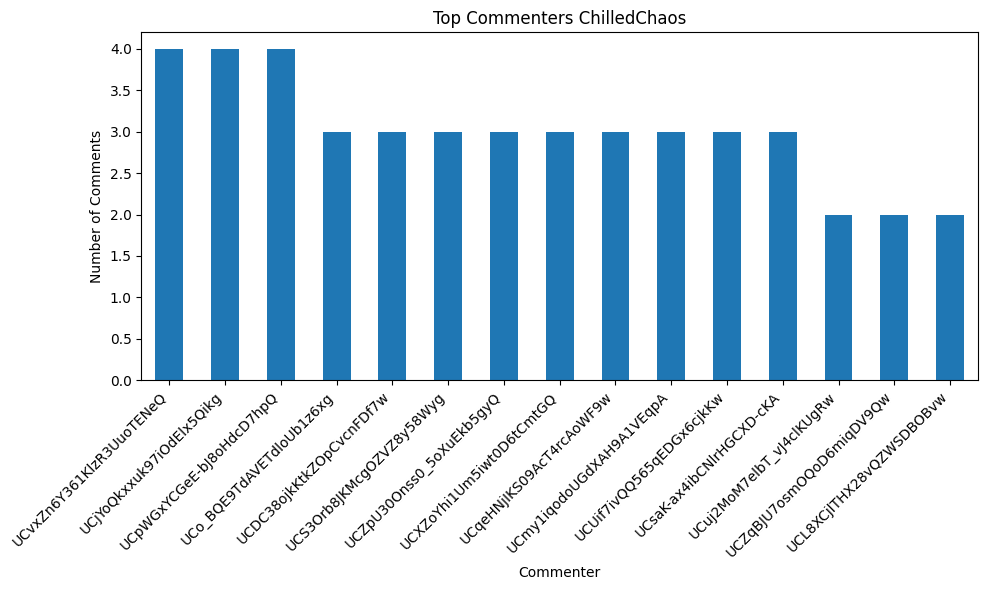

In [47]:
top_n = 15  # Number of top commenter to display
comment_counts = chilled_chaos_comments['Commenter'].value_counts().head(top_n)

# Plotting
plt.figure(figsize=(10, 6))
comment_counts.plot(kind='bar')
plt.title('Top Commenters ChilledChaos')
plt.xlabel('Commenter')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [27]:
chilled_chaos_comments[chilled_chaos_comments['Commenter'] == 'UCpWGxYCGeE-bJ8oHdcD7hpQ']

,Video ID,Published Date,Comment,Channel ID,Like Count,Commenter,Comment Date
55,9bq1eEhsVSc,2024-10-18T00:03:44Z,"""I woke up early so I wouldn't start drinking ...",UCpmu4uEZ8XcPjHdHh7_zFOg,3,UCpWGxYCGeE-bJ8oHdcD7hpQ,2024-10-18 15:13:30
261,6vKPdxnUojA,2024-10-15T00:26:30Z,In liar's dice there's roughly an 80% chance t...,UCpmu4uEZ8XcPjHdHh7_zFOg,1,UCpWGxYCGeE-bJ8oHdcD7hpQ,2024-10-15 17:41:26
274,6vKPdxnUojA,2024-10-15T00:26:30Z,27:29 is when Liars bar starts for anyone else...,UCpmu4uEZ8XcPjHdHh7_zFOg,1,UCpWGxYCGeE-bJ8oHdcD7hpQ,2024-10-15 17:10:44
312,4N-8lMO7Jas,2024-10-14T01:05:19Z,The game has good bones. Just needs copious am...,UCpmu4uEZ8XcPjHdHh7_zFOg,20,UCpWGxYCGeE-bJ8oHdcD7hpQ,2024-10-14 14:36:15


#### Mithzan

In [29]:
channel_name = 'Mithzan'
mithzan_comments= get_comments_on_latest_videos(channel_name)
mithzan_comments.to_csv(f'{channel_name}_comments.csv', index=False)

In [30]:
mithzan_comments['Commenter'].value_counts()

,count
Commenter,
UC7Fq1DhacBW6ESp9UoKx8Zg,6
UC1yGu1e4edtMS1YMc9c0LKg,5
UC-Fdo9JhRCJYh4os7hB202A,4
UCnjYMWcFOTYihfwL1c3fqJg,4
UCAbxfVX2m8u4NYpQacKIXig,4
...,...
UCLHtsf2LvGgc_OIeiB6GxKQ,1
UChWsOmhLNmSGU1bGXSsy5Qw,1
UCO0DfdfQguPpLMkJKapFS6Q,1


In [32]:
mithzan_comments[mithzan_comments['Commenter'] == 'UC7Fq1DhacBW6ESp9UoKx8Zg']

,Video ID,Published Date,Comment,Channel ID,Like Count,Commenter,Comment Date
50,UGFVtt1e0EA,2024-10-18T19:00:15Z,Doug’s question of the day. \n\n“Have you ever...,UCKajXDl2vPA3qUoJvBlfFaw,0,UC7Fq1DhacBW6ESp9UoKx8Zg,2024-10-19 06:16:30
51,UGFVtt1e0EA,2024-10-18T19:00:15Z,Hope you’ve all had/have a good day,UCKajXDl2vPA3qUoJvBlfFaw,0,UC7Fq1DhacBW6ESp9UoKx8Zg,2024-10-19 06:14:55
121,jFSlrg5WHU4,2024-10-17T19:00:30Z,Doug’s question of the day. \n\n“How do you fe...,UCKajXDl2vPA3qUoJvBlfFaw,2,UC7Fq1DhacBW6ESp9UoKx8Zg,2024-10-17 19:04:29
177,jFSlrg5WHU4,2024-10-17T19:00:30Z,Hope you’ve all had/have a good day,UCKajXDl2vPA3qUoJvBlfFaw,0,UC7Fq1DhacBW6ESp9UoKx8Zg,2024-10-17 19:03:46
265,c99QpVMbbeE,2024-10-16T19:00:29Z,Doug’s question of the day. \n\n“How do you fe...,UCKajXDl2vPA3qUoJvBlfFaw,0,UC7Fq1DhacBW6ESp9UoKx8Zg,2024-10-16 19:59:02
267,c99QpVMbbeE,2024-10-16T19:00:29Z,Hope you’ve all had/have a good day,UCKajXDl2vPA3qUoJvBlfFaw,0,UC7Fq1DhacBW6ESp9UoKx8Zg,2024-10-16 19:58:12
